In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
md_policing = pd.read_csv('md_statewide_2020_04_01.csv')

/var/folders/fb/fkyp2qxn7vxcnwtdtcm4_2x80000gn/T/ipykernel_90249/1371882148.py:1: DtypeWarning: Columns (1,2,3,9,10,11,12,13,14,15,16,17,19,20,21,22,23,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  md_policing = pd.read_csv('md_statewide_2020_04_01.csv')


In [3]:
md_policing.head()

,raw_row_number,date,time,location,subject_age,subject_race,subject_sex,department_name,type,disposition,...,search_conducted,search_person,search_vehicle,search_basis,reason_for_arrest,reason_for_search,reason_for_stop,raw_Race,raw_Outcome,raw_Arrest_Made
0,1,2009-01-01,NaN,NaN,NaN,black,male,Aberdeen PD,vehicular,NaN,...,False,False,False,NaN,NaN,NaN,--,b,warn,NaN
1,2,2009-01-01,NaN,NaN,NaN,black,male,Aberdeen PD,vehicular,none,...,True,True,True,NaN,stop,incarres,--,b,arr,NaN
2,3,2009-01-01,NaN,NaN,NaN,black,female,Aberdeen PD,vehicular,NaN,...,False,False,False,NaN,NaN,NaN,--,b,warn,NaN
3,4,2009-01-01,NaN,NaN,NaN,white,male,Aberdeen PD,vehicular,NaN,...,False,False,False,NaN,NaN,NaN,--,w,warn,NaN
4,5,2009-01-01,NaN,NaN,NaN,white,male,Aberdeen PD,vehicular,NaN,...,False,False,False,NaN,NaN,NaN,--,w,sero,NaN


In [4]:
md_policing.isna()
#looking for null values

,raw_row_number,date,time,location,subject_age,subject_race,subject_sex,department_name,type,disposition,...,search_conducted,search_person,search_vehicle,search_basis,reason_for_arrest,reason_for_search,reason_for_stop,raw_Race,raw_Outcome,raw_Arrest_Made
0,False,False,True,True,True,False,False,False,False,True,...,False,False,False,True,True,True,False,False,False,True
1,False,False,True,True,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,False,False,True,True,True,False,False,False,False,True,...,False,False,False,True,True,True,False,False,False,True
3,False,False,True,True,True,False,False,False,False,True,...,False,False,False,True,True,True,False,False,False,True
4,False,False,True,True,True,False,False,False,False,True,...,False,False,False,True,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3669660,False,False,True,True,True,False,False,False,False,True,...,False,False,False,True,True,True,False,False,True,True
3669661,False,False,True,True,True,False,False,False,False,True,...,False,False,False,True,True,True,False,False,True,True
3669662,False,False,True,True,True,False,False,False,False,True,...,False,False,False,True,True,True,False,False,True,True
3669663,False,False,True,True,True,False,False,False,False,True,...,False,False,False,True,True,True,False,False,False,True


In [5]:
md_policing_clean = md_policing.drop(columns = ['raw_row_number', 'time', 'location', 'subject_age', 'disposition', 
                            'reason_for_arrest', 'reason_for_search', 'reason_for_stop', 'raw_Arrest_Made', 
                            'violation', 'search_basis', 'contraband_found', 'contraband_drugs',
                           'contraband_weapons', 'raw_Race', 'raw_Outcome'])

#dropping unwanted columns

In [6]:
md_policing_clean['date'].dropna()
#dropping null values

0          2009-01-01
1          2009-01-01
2          2009-01-01
3          2009-01-01
4          2009-01-01
              ...    
3669660    2007-01-01
3669661    2007-01-01
3669662    2007-01-01
3669663    2007-01-01
3669664    2007-01-01
Name: date, Length: 3587052, dtype: object

In [7]:
import datetime as dt

In [8]:
md_policing_clean['date'] = pd.to_datetime(md_policing_clean['date'], format = '%Y-%m-%d')
#changing date formats

In [9]:
md_policing_clean['date']

0         2009-01-01
1         2009-01-01
2         2009-01-01
3         2009-01-01
4         2009-01-01
             ...    
3669660   2007-01-01
3669661   2007-01-01
3669662   2007-01-01
3669663   2007-01-01
3669664   2007-01-01
Name: date, Length: 3669665, dtype: datetime64[ns]

In [10]:
md_policing_clean['year'] = md_policing_clean['date'].dt.year
md_policing_clean['month'] = md_policing_clean['date'].dt.month
md_policing_clean['day'] = md_policing_clean['date'].dt.day
#adding columns

In [11]:
md_policing_clean['year']

0          2009.0
1          2009.0
2          2009.0
3          2009.0
4          2009.0
            ...  
3669660    2007.0
3669661    2007.0
3669662    2007.0
3669663    2007.0
3669664    2007.0
Name: year, Length: 3669665, dtype: float64

In [12]:
md_policing_clean['year'] = md_policing_clean.year.astype('Int64', errors='ignore')
md_policing_clean['month'] = md_policing_clean.month.astype('Int64', errors='ignore')
md_policing_clean['day'] = md_policing_clean.day.astype('Int64', errors='ignore')
#changing datatype for dates from floats to int

In [13]:
md_policing_clean.describe()

,year,month,day
count,3587052.0,3587052.0,3587052.0
mean,2010.797036,2.153233,4.449054
std,2.068067,2.679336,7.539668
min,2007.0,1.0,1.0
25%,2009.0,1.0,1.0
50%,2011.0,1.0,1.0
75%,2012.0,1.0,1.0
max,2014.0,12.0,31.0


In [14]:
md_policing_clean.groupby('year').describe()

month                                                      day  \
         count      mean       std  min  25%  50%   75%   max     count   
year                                                                      
2007  432333.0       1.0       0.0  1.0  1.0  1.0   1.0   1.0  432333.0   
2009  871631.0       1.0       0.0  1.0  1.0  1.0   1.0   1.0  871631.0   
2011  544812.0       1.0       0.0  1.0  1.0  1.0   1.0   1.0  544812.0   
2012  896138.0       1.0       0.0  1.0  1.0  1.0   1.0   1.0  896138.0   
2013  678000.0  6.862353  3.201992  1.0  4.0  7.0  10.0  12.0  678000.0   
2014  164138.0  1.987157  0.815661  1.0  1.0  2.0   3.0   3.0  164138.0   

                                                       
           mean       std  min  25%   50%   75%   max  
year                                                   
2007        1.0       0.0  1.0  1.0   1.0   1.0   1.0  
2009        1.0       0.0  1.0  1.0   1.0   1.0   1.0  
2011        1.0       0.0  1.0  1.0   1.0   1.0   1.0  
2012        1.0       0.0  1.0  1.0   1.0   1.0   1.0  
2013  15.793274  8.828035  1.0  8.0  16.0  23.0  31.0  
2014  15.269066  8.532616  1.0  8.0  15.0  22.0  31.0

In [15]:
year_count = md_policing_clean['year'].value_counts()
year_count
#stop counts by years

2012    896138
2009    871631
2013    678000
2011    544812
2007    432333
2014    164138
Name: year, dtype: Int64

In [16]:
year_count = year_count.sort_index()

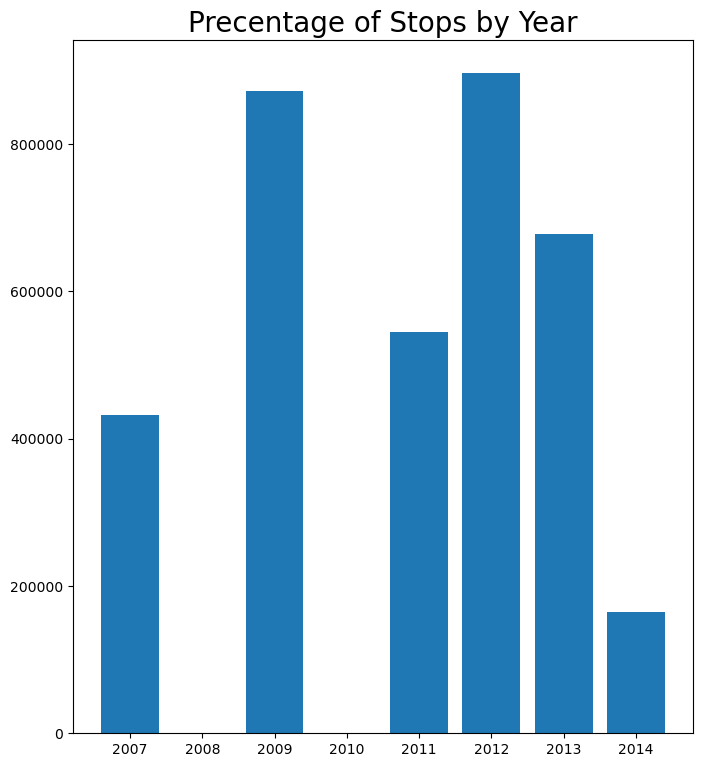

In [18]:
fig, ax = plt.subplots( figsize=(8, 9))

plt.bar(year_count.index, year_count)
ax.set_title("Precentage of Stops by Year", size = 20)

plt.show()

In [19]:
md_policing_clean.groupby(['subject_race', 'subject_sex']).describe()

year                                 \
                                        count         mean       std     min   
subject_race           subject_sex                                             
asian/pacific islander female         27708.0  2011.120723  2.061872  2007.0   
                       male           54242.0  2010.997235  2.068237  2007.0   
black                  female        471676.0  2010.925197  2.011315  2007.0   
                       male          847456.0  2010.793876  2.028244  2007.0   
hispanic               female         44989.0  2011.286492  1.923243  2007.0   
                       male          174313.0  2010.995491  2.005529  2007.0   
other                  female         20007.0  2011.593742   1.87876  2007.0   
                       male           58998.0  2011.258534    1.9991  2007.0   
unknown                female          1352.0  2010.984467  2.267897  2007.0   
                       male            3316.0  2010.998191  2.183994  2007.0   
white                  female        645725.0   2010.78926  2.100482  2007.0   
                       male         1205986.0  2010.655786  2.111987  2007.0   

                                                                        month  \
                                       25%     50%     75%     max      count   
subject_race           subject_sex                                              
asian/pacific islander female       2009.0  2012.0  2013.0  2014.0    27708.0   
                       male         2009.0  2012.0  2013.0  2014.0    54242.0   
black                  female       2009.0  2012.0  2012.0  2014.0   471676.0   
                       male         2009.0  2011.0  2012.0  2014.0   847456.0   
hispanic               female       2009.0  2012.0  2013.0  2014.0    44989.0   
                       male         2009.0  2012.0  2013.0  2014.0   174313.0   
other                  female       2011.0  2012.0  2013.0  2014.0    20007.0   
                       male         2009.0  2012.0  2013.0  2014.0    58998.0   
unknown                female       2012.0  2012.0  2012.0  2014.0     1352.0   
                       male         2012.0  2012.0  2012.0  2014.0     3316.0   
white                  female       2009.0  2011.0  2012.0  2014.0   645725.0   
                       male         2009.0  2011.0  2012.0  2014.0  1205986.0   

                                              ...                   day  \
                                        mean  ...  75%   max      count   
subject_race           subject_sex            ...                         
asian/pacific islander female       2.495056  ...  2.0  12.0    27708.0   
                       male         2.352292  ...  2.0  12.0    54242.0   
black                  female       2.210592  ...  1.0  12.0   471676.0   
                       male         2.102591  ...  1.0  12.0   847456.0   
hispanic               female       2.536042  ...  2.0  12.0    44989.0   
                       male         2.315823  ...  1.0  12.0   174313.0   
other                  female       2.924926  ...  3.0  12.0    20007.0   
                       male         2.621513  ...  3.0  12.0    58998.0   
unknown                female       1.797337  ...  1.0  12.0     1352.0   
                       male          1.54222  ...  1.0  12.0     3316.0   
white                  female       2.181145  ...  1.0  12.0   645725.0   
                       male         2.091947  ...  1.0  12.0  1205986.0   

                                                                             \
                                        mean       std  min  25%  50%   75%   
subject_race           subject_sex                                            
asian/pacific islander female       5.459073  8.315209  1.0  1.0  1.0   6.0   
                       male         5.056801  8.043438  1.0  1.0  1.0   3.0   
black                  female        4.57725  7.651803  1.0  1.0  1.0   1.0   
                       m

In [20]:
race = md_policing_clean['subject_race'].value_counts()
race
#stops count by race

white                     1867333
black                     1385858
hispanic                   221681
asian/pacific islander      82912
other                       80439
unknown                     17485
Name: subject_race, dtype: int64

In [21]:
sex = md_policing_clean['subject_sex'].value_counts()
sex
#stops count by race

male      2392127
female    1233477
Name: subject_sex, dtype: int64

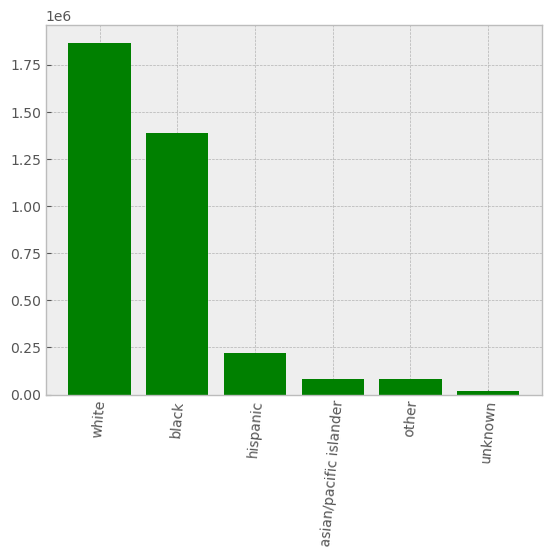

In [33]:
plt.style.use('bmh')

fig, ax = plt.subplots()

plt.bar(race.index, race, color = 'green')
plt.xticks(rotation = 85)

plt.show()

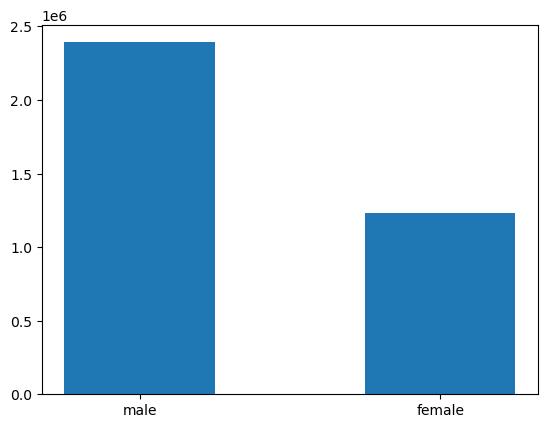

In [35]:
plt.style.use('default')

fig, ax = plt.subplots()

plt.bar(sex.index, sex, width = .5)


plt.show()

In [29]:
white = md_policing_clean[md_policing_clean['subject_race'] == 'white']
white = white['subject_sex'].value_counts()

In [30]:
black = md_policing_clean[md_policing_clean['subject_race'] == 'black']
black = black['subject_sex'].value_counts()

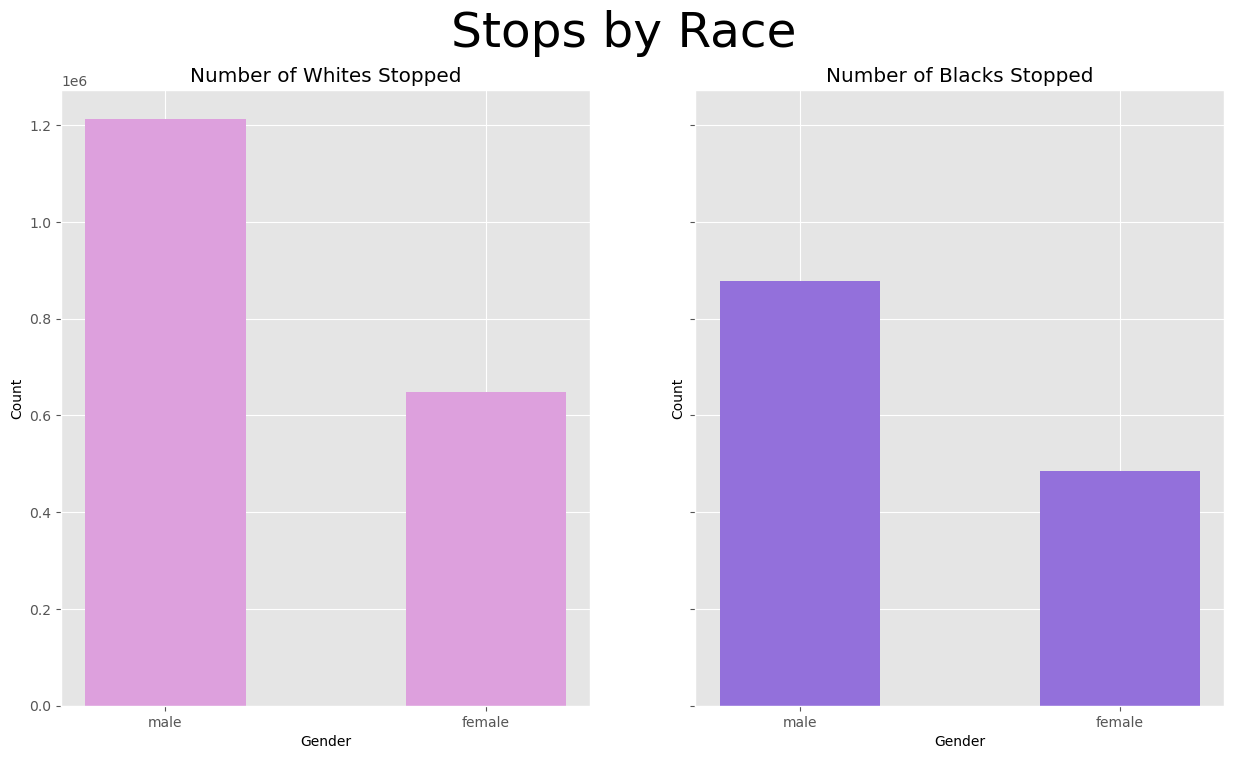

In [31]:
plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots( 1, 2, figsize = (15, 8), sharey = True)

ax1.bar(white.index, white, width = .5, color = 'plum')
ax2.bar(black.index, black, width = .5, color = 'mediumpurple')

plt.suptitle("Stops by Race", size = 35)
ax1.set(xlabel='Gender', ylabel='Count', title='Number of Whites Stopped')
ax2.set(xlabel='Gender', ylabel='Count', title='Number of Blacks Stopped')



plt.show()

In [41]:
outcome = md_policing_clean['outcome'].value_counts()
outcome = outcome.sort_index()

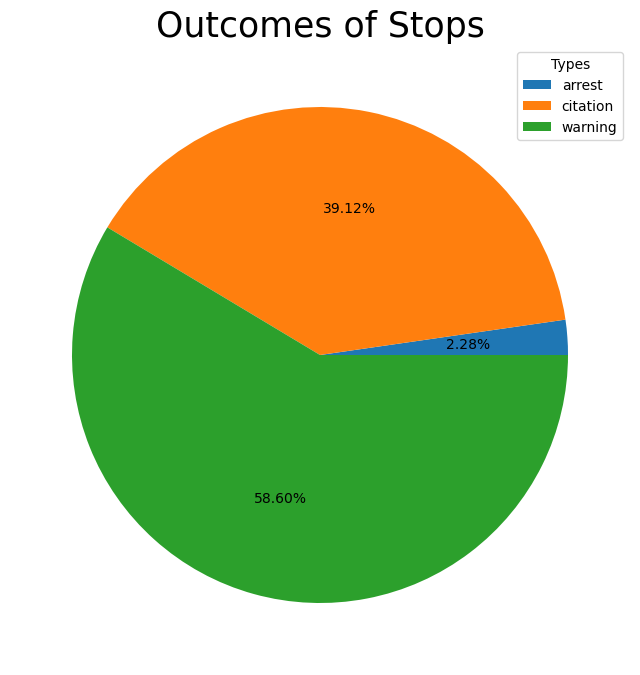

In [54]:
fig, ax = plt.subplots(figsize = (8,10))

ax.pie(outcome, autopct = '%1.2f%%')
ax.legend(labels = outcome.index, title = 'Types')
ax.set_title("Outcomes of Stops", size = 25)

plt.show()